# Experiments

For a full description of the experimental setup, see the [documentation](../docs/experimental-setup.md).

In [1]:
# General setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from typing import List

# Uncomment this line to enable interactive plots when running the experiment in Jupyter Notebook
# %matplotlib widget

# Prepare DataFrames to store the results
runtimes = pd.DataFrame(columns=["run_id", "scenario", "solver", "n_proposals", "run_iter", "seed", "start_time", "end_time", "runtime"])
results = pd.DataFrame(columns=["run_id", "utility_id", "adaptation_id", "utility"])

# Prepare a dict to store the adaptations (key: adaptation_id, value: adaptation)
adaptations = {}

# Prepare a dict to store the utility functions (key: utility_id, value: utility function)
utility_functions = {}

# Prepare a dict to store the expected utilities (key: scenario_id, value: expected utility)
expected_utilities = {}

## Overview

The experiments are conducted in the following steps for each scenario:
- Create a sample of utility functions
- For each optimization method:
    - For each seed:
        - Create 10 adaptation proposals
        - Evaluate the adaptation proposals using the utility functions
        - Determine the best adaptation proposal using the utility functions (max utility)
        - Determine the utility of the single (i.e., first/equally weighted) adaptation proposal
- Compare the distributions of maximum utilities for the solvers and number of proposals
- Compare the distributions of runtimes for the solvers and number of proposals

## Scenario 1: LIN+CONV

In this first scenario, we compare the maximum utilities and runtimes for an optimization with a convex Pareto frontier where the utility function can be expressed as a linear combination of the objectives.

In [2]:
import experiments.user
import experiments.problem

# Specify the scenario
SCENARIO_1 = "LIN+CONV"

# Get utility functions
SCENARIO_1_PREFERENCE_CRITERIA = ["neck", "shoulder_exp"]
utility_functions = experiments.user.get_utility_functions_for_different_seeds(SCENARIO_1_PREFERENCE_CRITERIA, n_functions=100, seed=111)

# Get MOO problem
SCENARIO_1_OBJECTIVES = SCENARIO_1_PREFERENCE_CRITERIA
problem_1 = experiments.problem.LayoutProblem(
    objectives=SCENARIO_1_OBJECTIVES
)

Having set up the utility functions and the optimization problem, we can now generate the adaptations for each solver and seed.

In [3]:
import experiments.simulate

runtimes_1, results_1 = experiments.simulate.get_runtimes_and_results_dfs(problem_1, SCENARIO_1, utility_functions, n_runs=10, seed=256)

Now, to create a baseline for the utility of the single adaptation proposal, we create a sample of random adaptation proposals and evaluate them using the utility functions.

In [4]:
import experiments.simulate

# Get baseline for expected utility
expected_utilities[SCENARIO_1] = experiments.simulate.get_expected_utility(SCENARIO_1_PREFERENCE_CRITERIA, list(utility_functions.values()), n_trials=1000, seed=111)

In [5]:
import experiments.visualize

experiments.visualize.get_results_df(runtimes_1, results_1)

,scenario,solver,n_proposals,mean_max_utility,std_max_utility,mean_runtime,std_runtime
0,LIN+CONV,Ours,1,0.889165,0.000161,2.085887,0.020201
1,LIN+CONV,Ours,10,0.932362,0.030191,2.086524,0.018858
2,LIN+CONV,WS,1,0.896064,0.031258,1.527366,0.025534
3,LIN+CONV,WS,10,0.896069,0.031260,15.354748,0.071441


In [6]:
import importlib
importlib.reload(experiments.visualize)

<module 'experiments.visualize' from '/Users/au721459/Developer/auit-pareto-solver/experiments/visualize.py'>

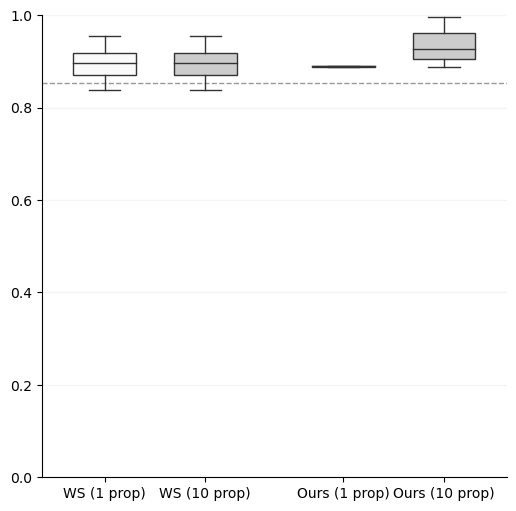

In [7]:
def plot_results(results: pd.DataFrame, runtimes: pd.DataFrame, expected_utility: float, scenario: str):
    """Plot the results for the Pareto solver."""
    # Create a figure
    fig, ax = plt.subplots(figsize=(6, 6))
    # Plot the runtimes
    solver_labels = ["WS (1 prop)", "WS (10 prop)", "Ours (1 prop)", "Ours (10 prop)"]
    solvers = ["WS", "Ours"]
    n_proposals = [1, 10]
    # Get a DataFrame with the max utilities for each condition and configuration
    max_utilities = experiments.visualize.get_max_utilities(runtimes, results)
    fig = experiments.visualize.plot_max_utilities_for_scenario(ax, scenario, solvers, n_proposals, solver_labels, max_utilities, expected_utility)
    return fig

fig_results_1 = plot_results(results_1, runtimes_1, expected_utilities[SCENARIO_1], SCENARIO_1)

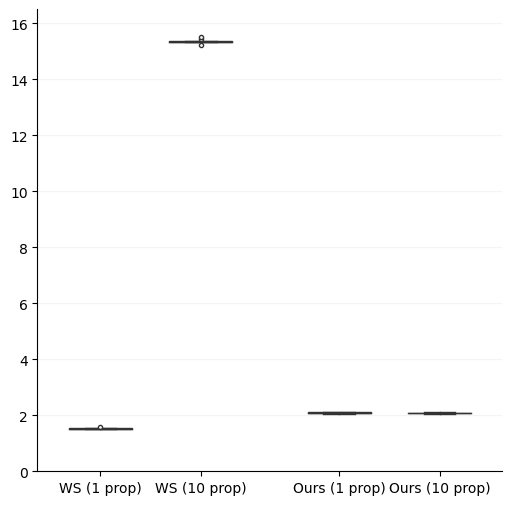

In [8]:
def plot_runtimes(runtimes: pd.DataFrame, scenario: str):
    """Plot the runtimes for the Pareto solver."""
    # Create a figure
    fig, ax = plt.subplots(figsize=(6, 6))
    # Plot the runtimes
    solver_labels = ["WS (1 prop)", "WS (10 prop)", "Ours (1 prop)", "Ours (10 prop)"]
    solvers = ["WS", "Ours"]
    n_proposals = [1, 10]
    fig = experiments.visualize.plot_runtimes_for_scenario(ax, scenario, solvers, n_proposals, solver_labels, runtimes)
    return fig

fig_runtimes_1 = plot_runtimes(runtimes_1, SCENARIO_1)

## Scenario 2: NLIN+NCONV

In this second scenario, we compare the maximum utilities and runtimes for an optimization with a non-convex (concave) Pareto frontier where the utility function cannot be expressed as a linear combination of the objectives.

In [9]:
import experiments.user
import experiments.problem

# Specify the scenario
SCENARIO_2 = "NLIN+NCONV"

# Get utility functions
SCENARIO_2_PREFERENCE_CRITERIA = ["neck", "shoulder_exp", "reach"]
utility_functions = experiments.user.get_utility_functions_for_different_seeds(SCENARIO_2_PREFERENCE_CRITERIA, n_functions=100, seed=111)

# Get MOO problem
SCENARIO_2_OBJECTIVES = ["neck", "shoulder"]
problem_2 = experiments.problem.LayoutProblem(
    objectives=SCENARIO_2_OBJECTIVES
)

Having set up the utility functions and the optimization problem, we can now generate the adaptations for each solver and seed.

In [10]:
import experiments.simulate

runtimes_2, results_2 = experiments.simulate.get_runtimes_and_results_dfs(problem_2, SCENARIO_2, utility_functions, n_runs=10, seed=256)


Now, to create a baseline for the utility of the single adaptation proposal, we create a sample of random adaptation proposals and evaluate them using the utility functions.

In [11]:
# Get baseline for expected utility
expected_utilities[SCENARIO_2] = experiments.simulate.get_expected_utility(SCENARIO_2_PREFERENCE_CRITERIA, list(utility_functions.values()), n_trials=1000, seed=111)
expected_utilities # {'CONV+LIN': 0.682938424996181, 'NCONV+NLIN': -0.4699047227399271}

{'LIN+CONV': 0.8524974871215657, 'NLIN+NCONV': 0.7059483359250157}

In [12]:
experiments.visualize.get_results_df(runtimes_2, results_2)

,scenario,solver,n_proposals,mean_max_utility,std_max_utility,mean_runtime,std_runtime
0,NLIN+NCONV,Ours,1,0.719566,0.092188,2.037488,0.026047
1,NLIN+NCONV,Ours,10,0.785290,0.064330,2.043350,0.013337
2,NLIN+NCONV,WS,1,0.768869,0.086119,1.487680,0.019287
3,NLIN+NCONV,WS,10,0.803586,0.059629,14.906400,0.092067


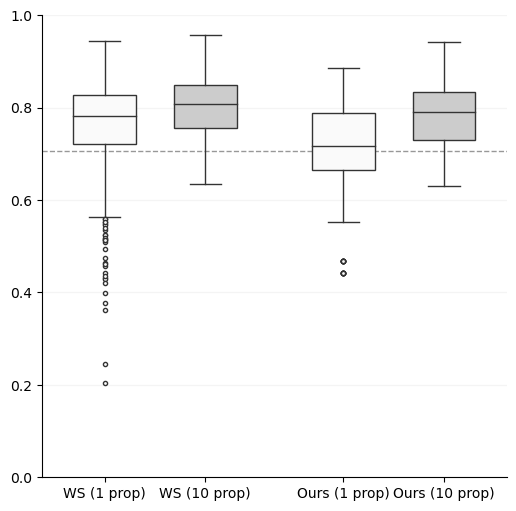

In [13]:
fig_results_2 = plot_results(results_2, runtimes_2, expected_utilities[SCENARIO_2], SCENARIO_2)

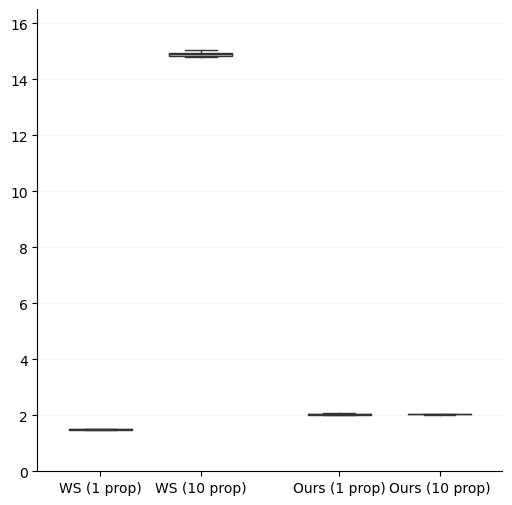

In [14]:
fig_runtimes_2 = plot_runtimes(runtimes_2, SCENARIO_2)

## Scenario 3: NLIN+CONV

In this third scenario, we compare the maximum utilities and runtimes for an optimization with a convex Pareto frontier where the utility function cannot be expressed as a linear combination of the objectives.

In [15]:
import experiments.user
import experiments.problem

# Specify the scenario
SCENARIO_3 = "NLIN+CONV"

# Get utility functions
SCENARIO_3_PREFERENCE_CRITERIA = ["neck", "shoulder_exp", "reach"]
utility_functions = experiments.user.get_utility_functions_for_different_seeds(SCENARIO_3_PREFERENCE_CRITERIA, n_functions=100, seed=111)

# Get MOO problem
SCENARIO_3_OBJECTIVES = ["neck", "shoulder_exp"]
problem_3 = experiments.problem.LayoutProblem(
    objectives=SCENARIO_3_OBJECTIVES
)

In [16]:
import experiments.simulate

runtimes_3, results_3 = experiments.simulate.get_runtimes_and_results_dfs(problem_3, SCENARIO_3, utility_functions, n_runs=10, seed=256)

In [17]:
# Get baseline for expected utility
expected_utilities[SCENARIO_3] = experiments.simulate.get_expected_utility(SCENARIO_3_PREFERENCE_CRITERIA, list(utility_functions.values()), n_trials=1000, seed=111)
expected_utilities # {'CONV+LIN': 0.682938424996181, 'NCONV+NLIN': -0.4699047227399271}

{'LIN+CONV': 0.8524974871215657,
 'NLIN+NCONV': 0.7059483359250157,
 'NLIN+CONV': 0.7059483359250157}

In [18]:
experiments.visualize.get_results_df(runtimes_3, results_3)

,scenario,solver,n_proposals,mean_max_utility,std_max_utility,mean_runtime,std_runtime
0,NLIN+CONV,Ours,1,0.694794,0.106691,2.151567,0.038764
1,NLIN+CONV,Ours,10,0.787844,0.063468,2.165884,0.049900
2,NLIN+CONV,WS,1,0.642711,0.138656,1.554073,0.019993
3,NLIN+CONV,WS,10,0.642715,0.138655,15.556722,0.158465


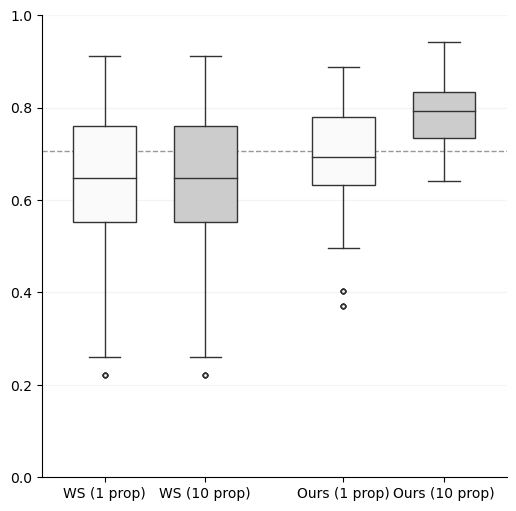

In [19]:
fig_results_3 = plot_results(results_3, runtimes_3, expected_utilities[SCENARIO_3], SCENARIO_3)

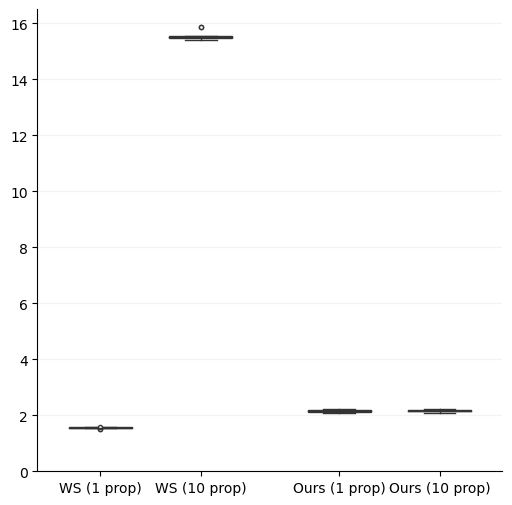

In [20]:
fig_runtimes_3 = plot_runtimes(runtimes_3, SCENARIO_3)

## Scenario 4: LIN+NCONV

In this fourth scenario, we compare the maximum utilities and runtimes for an optimization with a non-convex (concave) Pareto frontier where the utility function can be expressed as a linear combination of the objectives.

In [21]:
import experiments.user
import experiments.problem

# Specify the scenario
SCENARIO_4 = "LIN+NCONV"

# Get utility functions
SCENARIO_4_PREFERENCE_CRITERIA = ["neck", "shoulder_exp"]
utility_functions = experiments.user.get_utility_functions_for_different_seeds(SCENARIO_4_PREFERENCE_CRITERIA, n_functions=100, seed=111)

# Get MOO problem
SCENARIO_4_OBJECTIVES = ["neck", "shoulder"]
problem_4 = experiments.problem.LayoutProblem(
    objectives=SCENARIO_4_OBJECTIVES
)

In [22]:
import experiments.simulate

runtimes_4, results_4 = experiments.simulate.get_runtimes_and_results_dfs(problem_4, SCENARIO_4, utility_functions, n_runs=10, seed=256)

In [23]:
# Get baseline for expected utility
expected_utilities[SCENARIO_4] = experiments.simulate.get_expected_utility(SCENARIO_4_PREFERENCE_CRITERIA, list(utility_functions.values()), n_trials=1000, seed=111)
expected_utilities # {'CONV+LIN': 0.682938424996181, 'NCONV+NLIN': -0.4699047227399271}

{'LIN+CONV': 0.8524974871215657,
 'NLIN+NCONV': 0.7059483359250157,
 'NLIN+CONV': 0.7059483359250157,
 'LIN+NCONV': 0.8524974871215657}

In [24]:
experiments.visualize.get_results_df(runtimes_4, results_4)

,scenario,solver,n_proposals,mean_max_utility,std_max_utility,mean_runtime,std_runtime
0,LIN+NCONV,Ours,1,0.886457,0.008713,2.044609,0.023033
1,LIN+NCONV,Ours,10,0.932112,0.030128,2.036608,0.022496
2,LIN+NCONV,WS,1,0.872140,0.058111,1.512769,0.019732
3,LIN+NCONV,WS,10,0.907196,0.038916,14.961880,0.138779


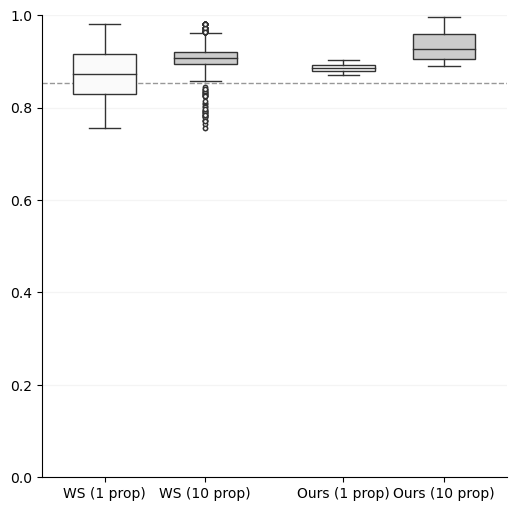

In [25]:
fig_results_4 = plot_results(results_4, runtimes_4, expected_utilities[SCENARIO_4], SCENARIO_4)

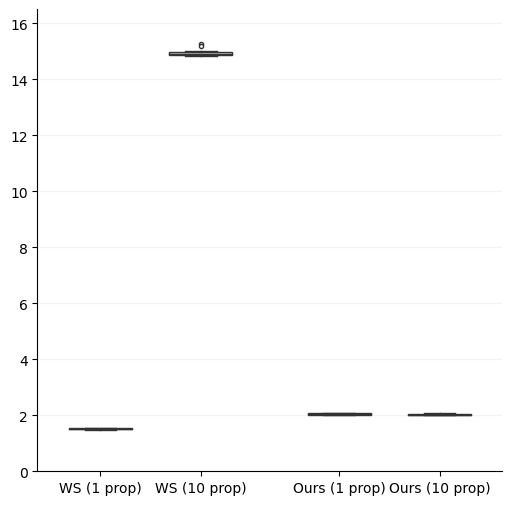

In [26]:
fig_runtimes_4 = plot_runtimes(runtimes_4, SCENARIO_4)

In [27]:
# Save expected utilities
import json
with open("data/expected_utilities.json", "w") as f:
    json.dump(expected_utilities, f)

## Results

Finally, let us view and plot the results of the experiments.

In [28]:
import json

# Read in the results from the experiments
runtimes = pd.read_csv("data/runtimes.csv")
results = pd.read_csv("data/results.csv")
expected_utilities = json.load(open("data/expected_utilities.json"))

In [29]:
runtimes = pd.concat([runtimes_1, runtimes_2, runtimes_3, runtimes_4])
results = pd.concat([results_1, results_2, results_3, results_4])
# Store the results
runtimes.to_csv("data/runtimes.csv", index=False)
results.to_csv("data/results.csv", index=False)

In [30]:
runtimes.head()

,run_id,scenario,solver,n_proposals,run_iter,seed,start_time,end_time,runtime
0,7fed15a1-e1e2-432e-adaf-5309e2772ea3,LIN+CONV,WS,1,1,113,2023-06-07 19:18:12.939742,2023-06-07 19:18:14.537118,1.597376
1,b2622aa3-6da7-430d-a728-e56e181ec195,LIN+CONV,WS,1,2,183,2023-06-07 19:18:14.541653,2023-06-07 19:18:16.069984,1.528331
2,c9f45583-82e9-4551-a687-e6e15d8ce5c8,LIN+CONV,WS,1,3,172,2023-06-07 19:18:16.074672,2023-06-07 19:18:17.576750,1.502078
3,61011bd0-855e-4480-8cdb-944f4ffdb828,LIN+CONV,WS,1,4,253,2023-06-07 19:18:17.581349,2023-06-07 19:18:19.111374,1.530025
4,82e1318d-a5ae-4d46-96a4-d960397066ec,LIN+CONV,WS,1,5,33,2023-06-07 19:18:19.116200,2023-06-07 19:18:20.617155,1.500955


In [31]:
results.head()

,run_id,utility_id,adaptation_id,utility
0,7fed15a1-e1e2-432e-adaf-5309e2772ea3,b96be9bc-c682-435a-95ef-38f6a2fa3800,376c1160-1d70-4ef6-9fbe-65ded0ad9d6f,0.890018
1,7fed15a1-e1e2-432e-adaf-5309e2772ea3,0df38ea8-e451-429f-a87b-676936ca3a9b,376c1160-1d70-4ef6-9fbe-65ded0ad9d6f,0.884713
2,7fed15a1-e1e2-432e-adaf-5309e2772ea3,79bef648-4d6a-4c75-bb7b-e70df16b2e7a,376c1160-1d70-4ef6-9fbe-65ded0ad9d6f,0.941557
3,7fed15a1-e1e2-432e-adaf-5309e2772ea3,b603b06d-131f-4f95-a300-5a0600637e7a,376c1160-1d70-4ef6-9fbe-65ded0ad9d6f,0.886893
4,7fed15a1-e1e2-432e-adaf-5309e2772ea3,48e160dc-d082-4112-bf86-9c5838a1c2d1,376c1160-1d70-4ef6-9fbe-65ded0ad9d6f,0.900313


In [32]:
import experiments.visualize

# SEED = 42
# random_runtimes = experiments.visualize.create_random_runtimes(seed=SEED)
# random_utilities = experiments.visualize.create_random_utilities(seed=SEED)
# expected_utilities = {"CONV+LIN": 0.5, "NCONV+NLIN": 0.5}
experiments.visualize.get_results_df(runtimes, results)

,scenario,solver,n_proposals,mean_max_utility,std_max_utility,mean_runtime,std_runtime
0,LIN+CONV,Ours,1,0.889165,0.000161,2.085887,0.020201
1,LIN+CONV,Ours,10,0.932362,0.030191,2.086524,0.018858
2,LIN+CONV,WS,1,0.896064,0.031258,1.527366,0.025534
3,LIN+CONV,WS,10,0.896069,0.031260,15.354748,0.071441
4,LIN+NCONV,Ours,1,0.886457,0.008713,2.044609,0.023033
5,LIN+NCONV,Ours,10,0.932112,0.030128,2.036608,0.022496
6,LIN+NCONV,WS,1,0.872140,0.058111,1.512769,0.019732
7,LIN+NCONV,WS,10,0.907196,0.038916,14.961880,0.138779
8,NLIN+CONV,Ours,1,0.694794,0.106691,2.151567,0.038764
9,NLIN+CONV,Ours,10,0.787844,0.063468,2.165884,0.049900


In [33]:
def get_results_latex(runtimes, results):
    df = experiments.visualize.get_results_df(runtimes, results)
    table = pd.pivot_table(df, values=['mean_max_utility', 'std_max_utility', 'mean_runtime', 'std_runtime'],
                       index=['solver', 'n_proposals'],
                       columns=['scenario'])

    result = table.applymap(lambda x: f'{x:.2f}')
    result.index.names = ['Optim', 'No. Props']
    result.columns.names = ['Scenario', '']

    return result

get_results_latex(runtimes, results)

Scenario        mean_max_utility                                mean_runtime  \
                        LIN+CONV LIN+NCONV NLIN+CONV NLIN+NCONV     LIN+CONV   
Optim No. Props                                                                
Ours  1                     0.89      0.89      0.69       0.72         2.09   
      10                    0.93      0.93      0.79       0.79         2.09   
WS    1                     0.90      0.87      0.64       0.77         1.53   
      10                    0.90      0.91      0.64       0.80        15.35   

Scenario                                       std_max_utility            \
                LIN+NCONV NLIN+CONV NLIN+NCONV        LIN+CONV LIN+NCONV   
Optim No. Props                                                            
Ours  1              2.04      2.15       2.04            0.00      0.01   
      10             2.04      2.17       2.04            0.03      0.03   
WS    1              1.51      1.55       1.49            0.03      0.06   
      10            14.96     15.56      14.91            0.03      0.04   

Scenario                             std_runtime                      \
                NLIN+CONV NLIN+NCONV    LIN+CONV LIN+NCONV NLIN+CONV   
Optim No. Props                                                        
Ours  1              0.11       0.09        0.02      0.02      0.04   
      10             0.06       0.06        0.02      0.02      0.05   
WS    1              0.14       0.09        0.03      0.02      0.02   
      10             0.14       0.06        0.07      0.14      0.16   

Scenario                    
                NLIN+NCONV  
Optim No. Props             
Ours  1               0.03  
      10              0.01  
WS    1               0.02  
      10              0.09

In [34]:
import importlib
importlib.reload(experiments.visualize)

<module 'experiments.visualize' from '/Users/au721459/Developer/auit-pareto-solver/experiments/visualize.py'>

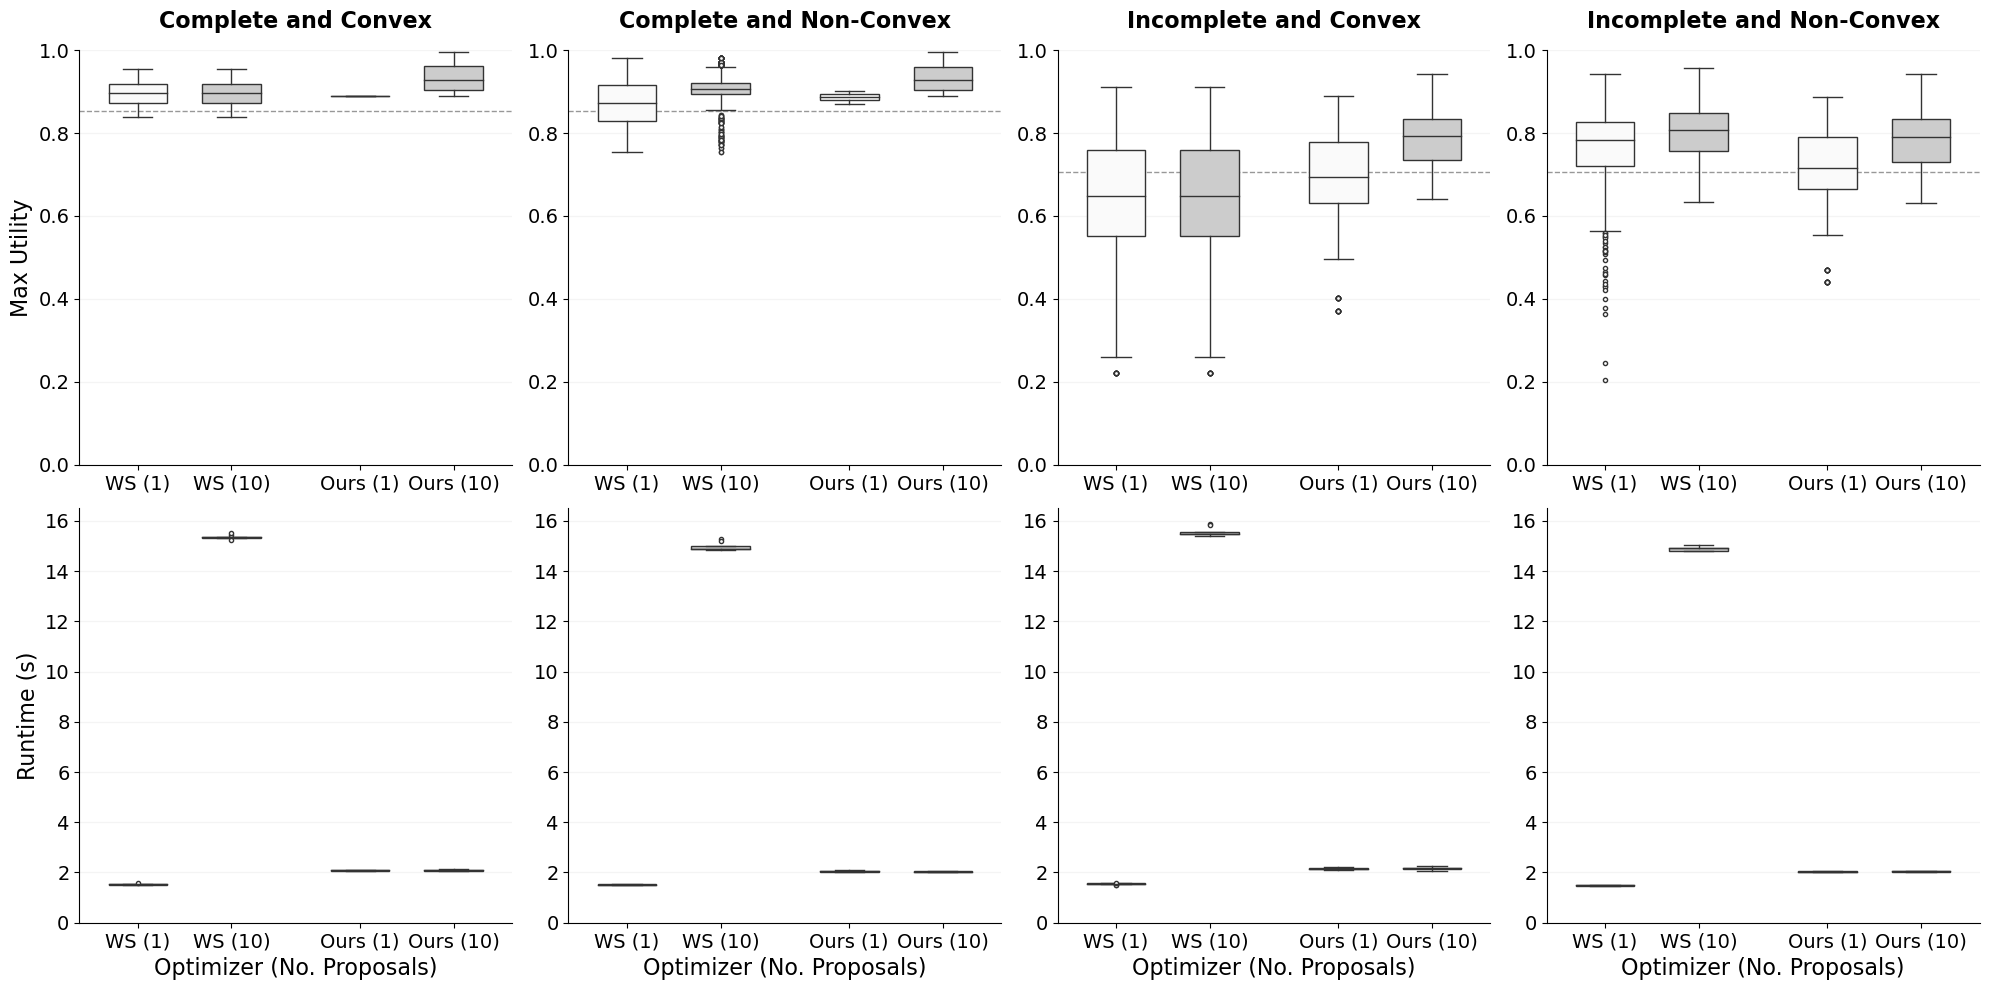

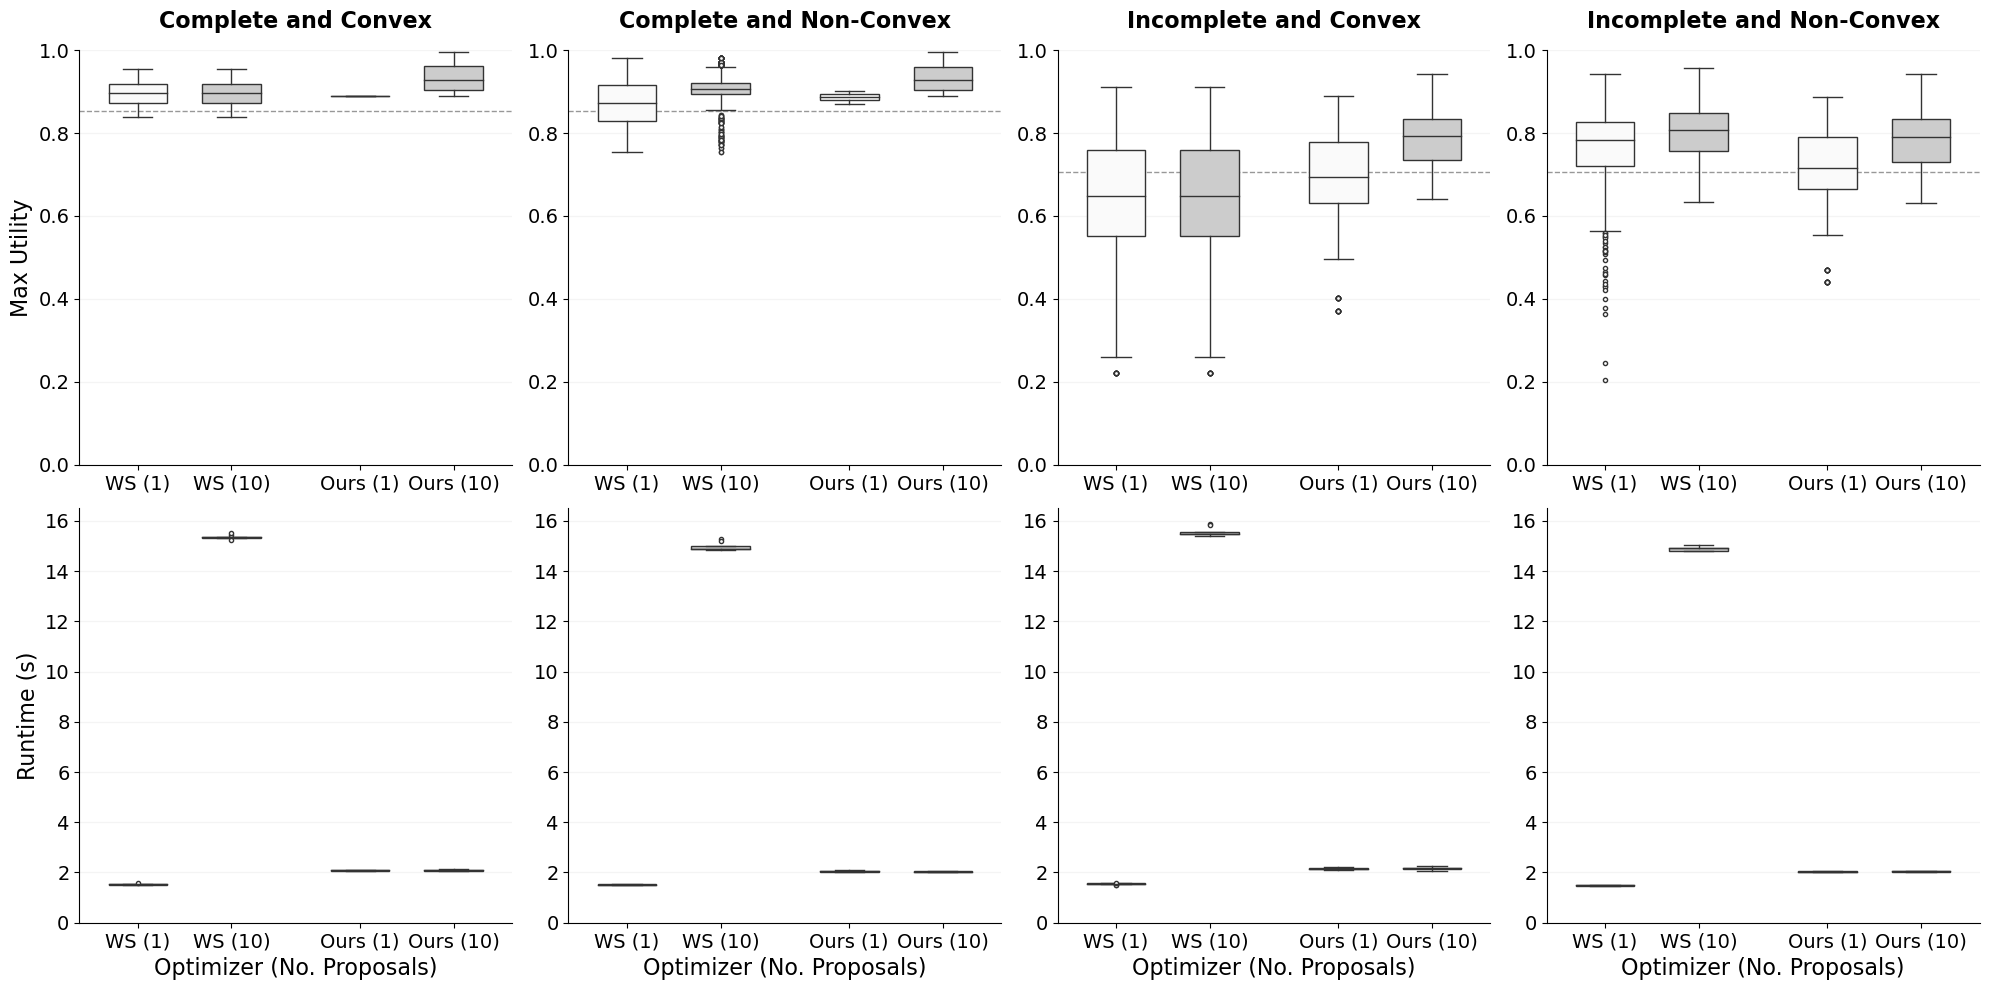

In [35]:
# fig_runtimes = experiments.visualize.plot_runtimes(random_runtimes)
# fig_max_utilities = experiments.visualize.plot_max_utilities(random_runtimes, random_utilities, expected_utilities)
fig_results = experiments.visualize.plot_results(runtimes, results, expected_utilities, scenarios=["LIN+CONV", "LIN+NCONV", "NLIN+CONV", "NLIN+NCONV"])
fig_results

In [36]:
# Save the figure
fig_results.savefig("figures/results.pdf", bbox_inches="tight")
fig_results.savefig("figures/results.png", bbox_inches="tight", dpi=300)

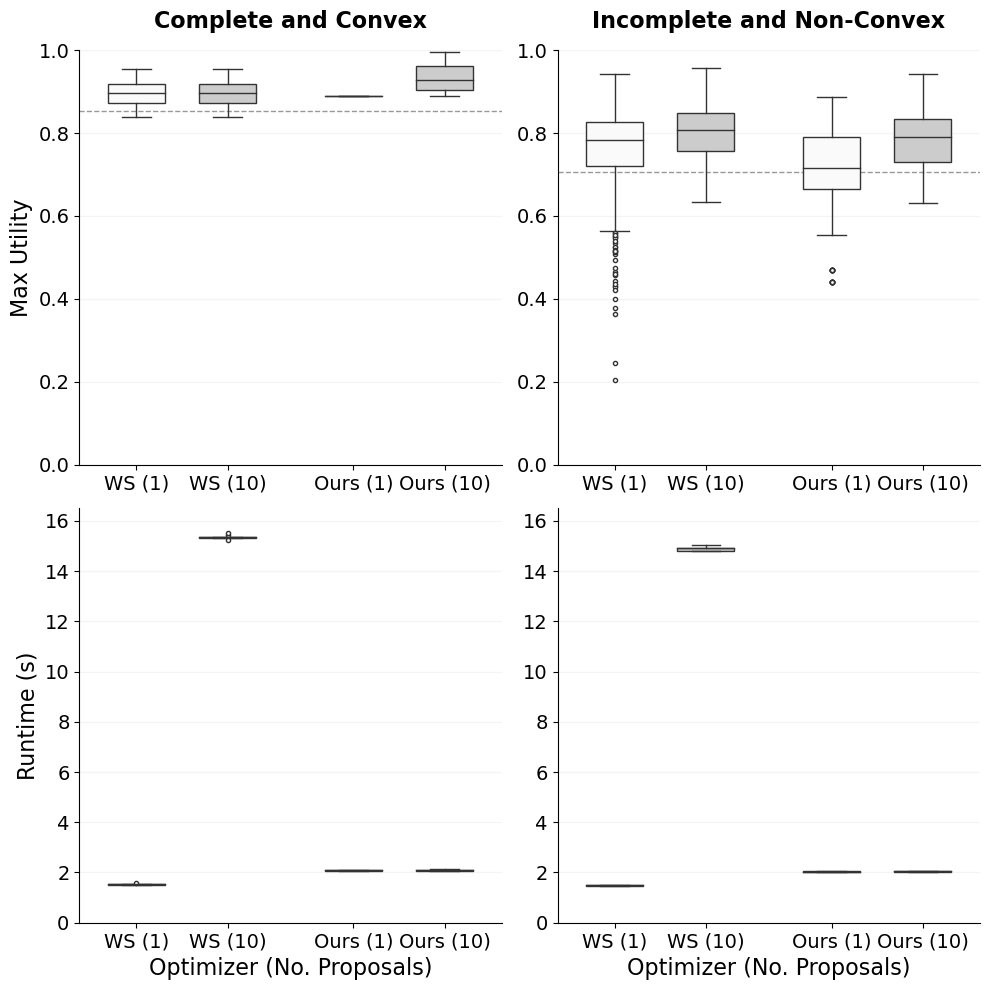

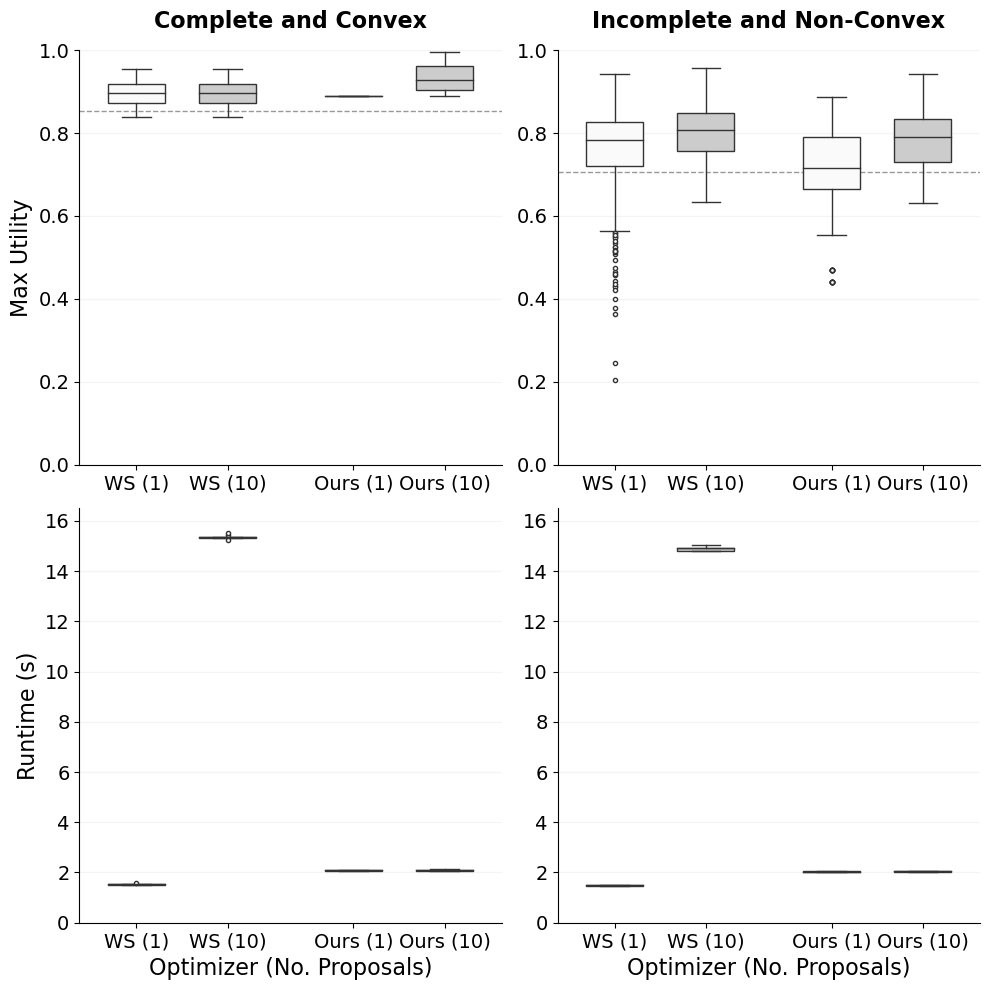

In [37]:
fig_results = experiments.visualize.plot_results(runtimes, results, expected_utilities, scenarios=["LIN+CONV", "NLIN+NCONV"])
fig_results

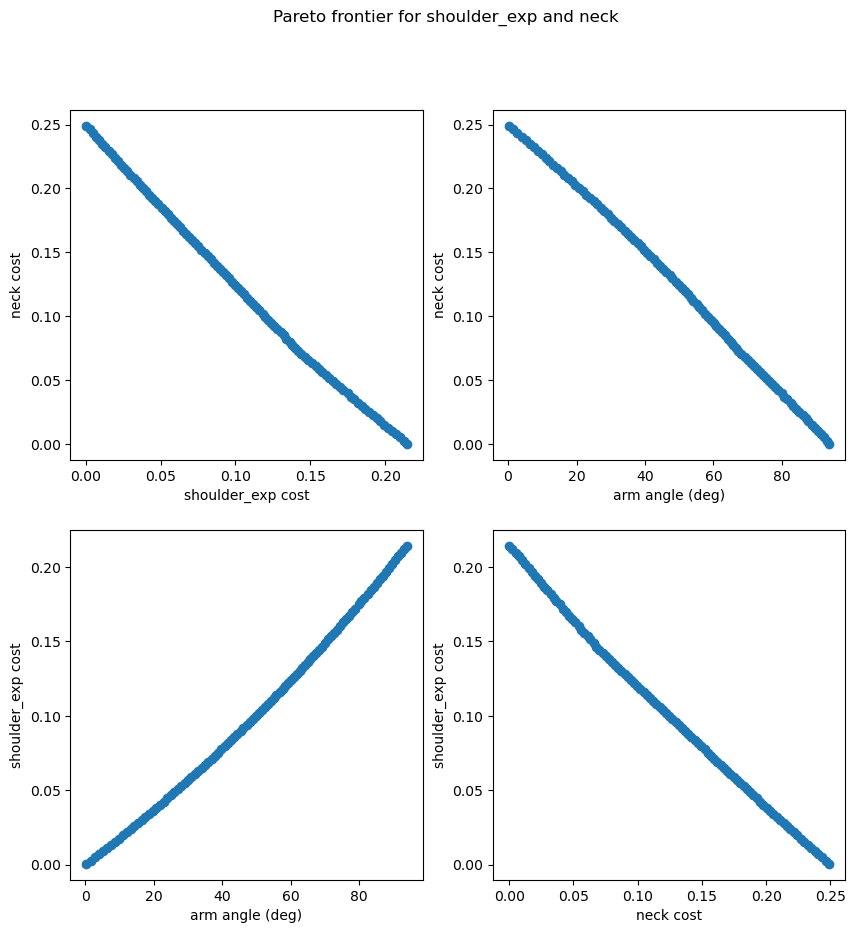

In [38]:
import AUIT
import experiments.config

# Verify convex Pareto frontier shape for scenario 1
def plot_pareto_fontier(objective_x="neck", objective_y="shoulder_exp"):
    problem = experiments.problem.LayoutProblem([objective_x, objective_y])
    solver = experiments.pareto_solver.ParetoSolver(problem=problem, pop=100, n_gen=100, seed=42)
    pareto_optimal_adaptations = solver.get_adaptations()
    get_utility_x = experiments.user.get_utility_function([objective_x])
    get_utility_y = experiments.user.get_utility_function([objective_y])
    x_costs = [1 - get_utility_x(adaptation) for adaptation in pareto_optimal_adaptations]
    y_costs = [1 - get_utility_y(adaptation) for adaptation in pareto_optimal_adaptations]
    # Create a new figure with four subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(f"Pareto frontier for {objective_x} and {objective_y}")
    # Plot Pareto frontier
    axes[0, 0].scatter(x_costs, y_costs)
    axes[0, 0].set_xlabel(f"{objective_x} cost")
    axes[0, 0].set_ylabel(f"{objective_y} cost")
    # Plot x cost dependent on y-position
    axes[1, 0].scatter([AUIT.get_arm_angle_deg(experiments.config.SHOULDER_JOINT_POSITION, adaptation.items[0]) for adaptation in pareto_optimal_adaptations], x_costs)
    axes[1, 0].set_xlabel("arm angle (deg)")
    axes[1, 0].set_ylabel(f"{objective_x} cost")
    # Plot y cost dependent on y-position
    axes[0, 1].scatter([AUIT.get_arm_angle_deg(experiments.config.SHOULDER_JOINT_POSITION, adaptation.items[0]) for adaptation in pareto_optimal_adaptations], y_costs)
    axes[0, 1].set_xlabel("arm angle (deg)")
    axes[0, 1].set_ylabel(f"{objective_y} cost")
    # Plot Pareto frontier
    axes[1, 1].scatter(y_costs, x_costs)
    axes[1, 1].set_xlabel(f"{objective_y} cost")
    axes[1, 1].set_ylabel(f"{objective_x} cost")
    plt.show()

plot_pareto_fontier("shoulder_exp", "neck")
    

## Scenario 5: SemanticAdapt

In this additional scenario, we add a semantic agreement objective to our non-convex and non-linear utility function.

In [39]:
import experiments.user
import experiments.problem

# Specify the scenario
SCENARIO_5 = "SemanticAdapt"

# Get utility functions
SCENARIO_5_PREFERENCE_CRITERIA = ["neck", "shoulder_exp", "reach", "semantics"]
utility_functions = experiments.user.get_utility_functions_for_different_seeds(SCENARIO_5_PREFERENCE_CRITERIA, n_functions=100, seed=111)

# Get MOO problem
SCENARIO_5_OBJECTIVES = ["neck", "shoulder"]
problem_5 = experiments.problem.LayoutProblem(
    objectives=SCENARIO_5_OBJECTIVES
)

Having set up the utility functions and the optimization problem, we can now generate the adaptations for each solver and seed.

In [40]:
import experiments.simulate

runtimes_5, results_5 = experiments.simulate.get_runtimes_and_results_dfs(problem_5, SCENARIO_5, utility_functions, n_runs=10, seed=256)


Now, to create a baseline for the utility of the single adaptation proposal, we create a sample of random adaptation proposals and evaluate them using the utility functions.

In [41]:
# Get baseline for expected utility
expected_utilities[SCENARIO_5] = experiments.simulate.get_expected_utility(SCENARIO_5_PREFERENCE_CRITERIA, list(utility_functions.values()), n_trials=1000, seed=111)
expected_utilities

{'LIN+CONV': 0.8524974871215657,
 'NLIN+NCONV': 0.7059483359250157,
 'NLIN+CONV': 0.7059483359250157,
 'LIN+NCONV': 0.8524974871215657,
 'SemanticAdapt': 0.6496976932921533}

In [42]:
experiments.visualize.get_results_df(runtimes_5, results_5)

,scenario,solver,n_proposals,mean_max_utility,std_max_utility,mean_runtime,std_runtime
0,SemanticAdapt,Ours,1,0.665619,0.070259,2.044168,0.027016
1,SemanticAdapt,Ours,10,0.718007,0.059821,2.041642,0.030131
2,SemanticAdapt,WS,1,0.704266,0.072536,1.509543,0.024492
3,SemanticAdapt,WS,10,0.729731,0.060070,14.962203,0.064832


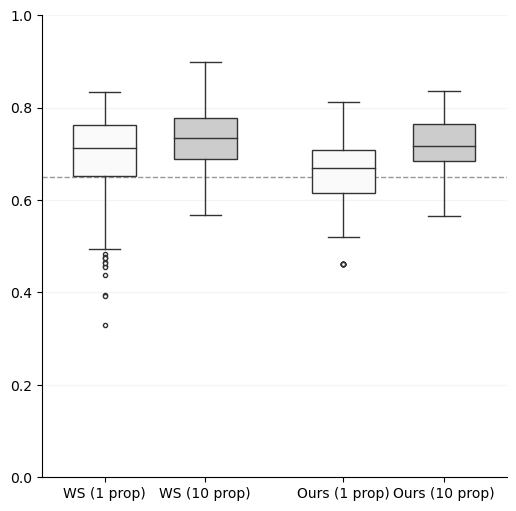

In [43]:
fig_results_5 = plot_results(results_5, runtimes_5, expected_utilities[SCENARIO_5], SCENARIO_5)

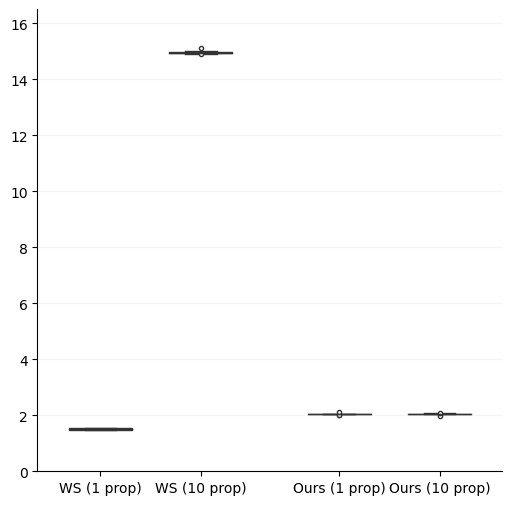

In [44]:
fig_runtimes_5 = plot_runtimes(runtimes_5, SCENARIO_5)

## Sensitivity Analysis: Semantic Cost

In this additional evaluation, we analyze the sensitivity of the semantic cost from the SemanticAdapt scenario to the number of objects in the interaction space and to the variance of the positive and negative association scores.

In [21]:
import experiments.sensitivity
import numpy as np

number_of_objects_params = np.logspace(base=2, start=0, stop=6, num=7, dtype=int) # 1 to 64
association_score_variance_params = np.logspace(base=2, start=1, stop=7, num=7)/100. # 0.02 to 1.28
association_dicts = experiments.sensitivity.get_clutter_association_grid(
    number_of_objects_params=number_of_objects_params,
    association_score_variance_params=association_score_variance_params,
    seed=42,
)
semantic_costs = experiments.sensitivity.get_minimum_semantic_costs_for_grid(
    association_dicts=association_dicts,
    seed=42,
)
semantic_costs_grid_df = experiments.sensitivity.get_semantic_costs_grid_dataframe(
    association_dicts=association_dicts,
    semantic_costs=semantic_costs,
)
semantic_costs_grid_df.pivot(index="number_of_objects", columns="association_score_variance", values="minimum_semantic_cost")

association_score_variance,0.02,0.04,0.08,0.16,0.32,0.64,1.28
number_of_objects,,,,,,,
1,0.500661,0.500569,0.500385,5.000164e-01,3.720076e-44,3.720076e-44,3.720076e-44
2,0.500661,0.500569,0.500541,5.000569e-01,3.720076e-44,3.720076e-44,3.720076e-44
4,0.501049,0.500945,0.500830,5.000709e-01,3.720076e-44,3.720076e-44,3.720076e-44
8,0.501928,0.501902,0.501758,5.003038e-01,3.720076e-44,3.720076e-44,3.720076e-44
16,0.502543,0.502025,0.500990,3.720076e-44,3.720076e-44,3.720076e-44,3.720076e-44
32,0.503235,0.503236,0.502082,3.720076e-44,3.720076e-44,3.720076e-44,3.720076e-44
64,0.503412,0.502962,0.502424,3.720076e-44,3.720076e-44,3.720076e-44,3.720076e-44


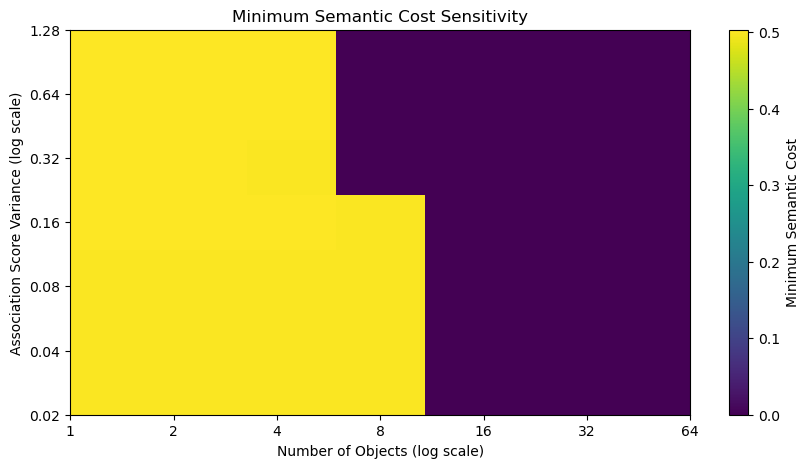

In [19]:
from experiments.visualize import plot_minimum_semantic_cost_sensitivity

fig = plot_minimum_semantic_cost_sensitivity(semantic_costs_grid_df)